In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
cd zippedData/

C:\Users\joshu\Documents\Flatiron\phase1_project\dsc-phase-1-project-v2-4\zippedData


In [3]:
movie_ratings = pd.read_csv('tmdb.movies.csv.gz')

movie_ratings = movie_ratings.drop('Unnamed: 0', axis=1)

movie_ratings = movie_ratings.rename(columns={'original_title': 'movie'})
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   movie              26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.8+ MB


In [4]:
#starwars = movie_ratings.loc[movie_ratings['movie'].str.contains('Cinder')]
#starwars

In [5]:
movie_ratings = movie_ratings.replace('Star Wars: The Last Jedi', 'Star Wars Ep. VIII: The Last Jedi')
movie_ratings = movie_ratings.replace('Star Wars: The Force Awakens', 'Star Wars Ep. VII: The Force Awakens')

In [6]:
#movie_ratings[(movie_ratings == 'Black Panther').any(axis=1)]

In [7]:
movie_ratings['vote_average'].median()

6.0

In [8]:
movie_ratings['vote_average'].mean()

5.9912810649772155

In [9]:
movie_ratings['vote_average'].mode()

0    6.0
Name: vote_average, dtype: float64

In [10]:
movie_ratings['vote_count'].median()

5.0

In [11]:
movie_ratings['vote_count'].mean()

194.22483689708488

In [12]:
movie_ratings['vote_count'].mode()

0    1
Name: vote_count, dtype: int64

In [13]:
movie_ratings = movie_ratings[movie_ratings.vote_count >= 50]

In [61]:
budget = pd.read_csv('tn.movie_budgets.csv.gz')

budget['production_budget'] = budget['production_budget'].map(lambda x: x.lstrip('$'))
budget['domestic_gross'] = budget['domestic_gross'].map(lambda x: x.lstrip('$'))
budget['worldwide_gross'] = budget['worldwide_gross'].map(lambda x: x.lstrip('$'))

budget['production_budget'] = budget['production_budget'].replace(',', '', regex=True)
budget['domestic_gross'] = budget['domestic_gross'].replace(',', '', regex=True)
budget['worldwide_gross'] = budget['worldwide_gross'].replace(',', '', regex=True)
budget['domestic_gross'] = budget['domestic_gross'].astype('int64')
budget['worldwide_gross'] = budget['worldwide_gross'].astype('int64')
budget['production_budget'] = budget['production_budget'].astype('int64')

budget['ROI'] = budget['domestic_gross'] + budget['worldwide_gross'] - budget['production_budget']

budget.sort_values(by='ROI', ascending=False).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 2
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
 6   ROI                5782 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 361.4+ KB


In [15]:
budget = budget[(budget['domestic_gross'] > 0) & (budget['worldwide_gross'] > 0)]

In [82]:
starwars1 = budget.loc[budget['movie'].str.contains('Harry Potter')]
starwars1

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
19,20,"Jul 15, 2009",Harry Potter and the Half-Blood Prince,250000000,302089278,935213767,987303045
157,58,"Jul 11, 2007",Harry Potter and the Order of the Phoenix,150000000,292137260,943076457,1085213717
158,59,"Nov 18, 2005",Harry Potter and the Goblet of Fire,150000000,290201752,897099794,1037301546
238,39,"Jun 4, 2004",Harry Potter and the Prisoner of Azkaban,130000000,249757726,796907323,916665049
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1597886314
262,63,"Nov 16, 2001",Harry Potter and the Sorcererâs Stone,125000000,317871467,975047606,1167919073
263,64,"Nov 19, 2010",Harry Potter and the Deathly Hallows: Part I,125000000,296131568,960431568,1131563136
363,64,"Nov 15, 2002",Harry Potter and the Chamber of Secrets,100000000,262233381,879225135,1041458516


In [17]:
movie_ratings['release_date'] = pd.to_datetime(movie_ratings['release_date'])
movie_ratings['release_date'] = movie_ratings['release_date'].dt.strftime('%b %d, %Y')

In [18]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5108 entries, 0 to 25148
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          5108 non-null   object 
 1   id                 5108 non-null   int64  
 2   original_language  5108 non-null   object 
 3   movie              5108 non-null   object 
 4   popularity         5108 non-null   float64
 5   release_date       5108 non-null   object 
 6   title              5108 non-null   object 
 7   vote_average       5108 non-null   float64
 8   vote_count         5108 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 399.1+ KB


In [19]:
merged = pd.merge(budget, movie_ratings, how='left', left_on=['movie','release_date'], right_on=['movie','release_date'])

In [20]:
merged.head()

,id_x,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,genre_ids,id_y,original_language,popularity,title,vote_average,vote_count
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3111852904,"[28, 12, 14, 878]",19995.0,en,26.526,Avatar,7.4,18676.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,"[12, 28, 14]",1865.0,en,30.579,Pirates of the Caribbean: On Stranger Tides,6.4,8571.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-157475300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129,"[14, 12, 878, 28]",181808.0,en,34.293,Star Wars Ep. VIII: The Last Jedi,7.0,8534.0


In [21]:
len(merged['movie'])

5333

In [22]:
merged = merged.drop(['id_x', 'genre_ids', 'id_y'], axis=1)

In [23]:
merged = merged.drop_duplicates(subset=['movie'])

In [24]:
merged = merged.dropna()

In [25]:
len(merged['movie'])

846

In [26]:
merged_top = merged.sort_values(by='ROI', ascending=False)
merged_top = merged_top.iloc[:250]

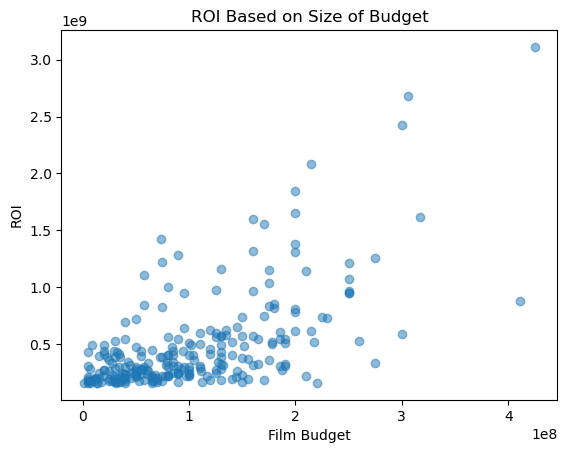

In [27]:
fig, ax = plt.subplots()
ax.plot(figsize=(5,5))

x = merged_top['production_budget']
y = merged_top['ROI']
ax.scatter(x, y, alpha=0.5)

ax.set_xlabel('Film Budget')
ax.set_ylabel('ROI')
ax.set_title('ROI Based on Size of Budget');

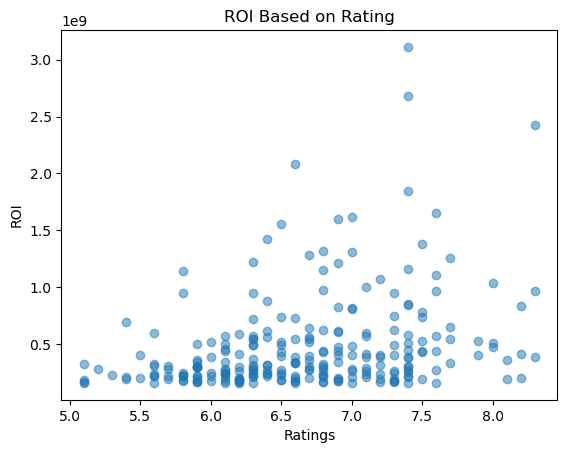

In [28]:
fig, ax = plt.subplots()
ax.plot(figsize=(5,5))

x = merged_top['vote_average']
y = merged_top['ROI']
ax.scatter(x, y, alpha=0.5)

ax.set_xlabel('Ratings')
ax.set_ylabel('ROI')
ax.set_title('ROI Based on Rating');

In [29]:
merged_bot = merged.sort_values(by='ROI', ascending=True)
merged_bot = merged_bot.iloc[:250]

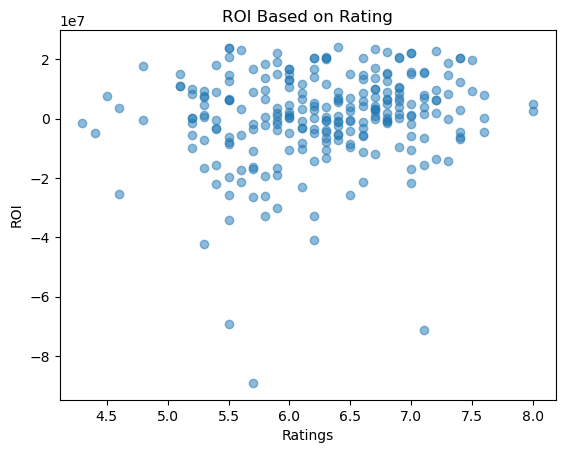

In [30]:
fig, ax = plt.subplots()
ax.plot(figsize=(5,5))

x = merged_bot['vote_average']
y = merged_bot['ROI']
ax.scatter(x, y, alpha=0.5)

ax.set_xlabel('Ratings')
ax.set_ylabel('ROI')
ax.set_title('ROI Based on Rating');

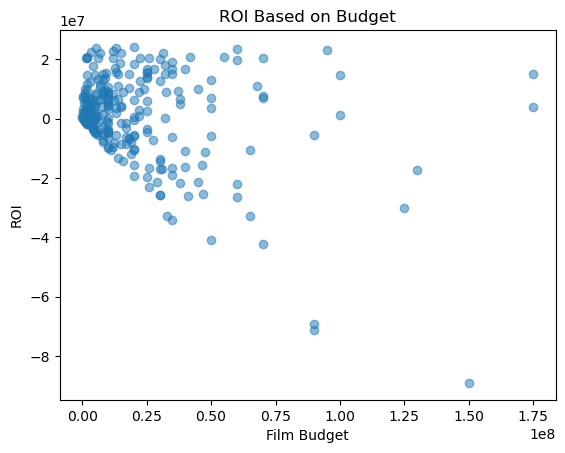

In [31]:
fig, ax = plt.subplots()
ax.plot(figsize=(5,5))

x = merged_bot['production_budget']
y = merged_bot['ROI']
ax.scatter(x, y, alpha=0.5)

ax.set_xlabel('Film Budget')
ax.set_ylabel('ROI')
ax.set_title('ROI Based on Budget');

In [32]:
merged_mid = merged.sort_values(by='ROI', ascending=True)
merged_mid = merged_mid.iloc[300:500]

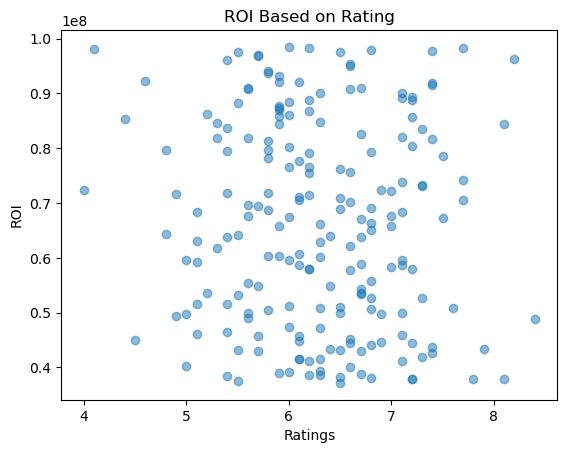

In [33]:
fig, ax = plt.subplots()
ax.plot(figsize=(5,5))

x = merged_mid['vote_average']
y = merged_mid['ROI']
ax.scatter(x, y, alpha=0.5)

ax.set_xlabel('Ratings')
ax.set_ylabel('ROI')
ax.set_title('ROI Based on Rating');

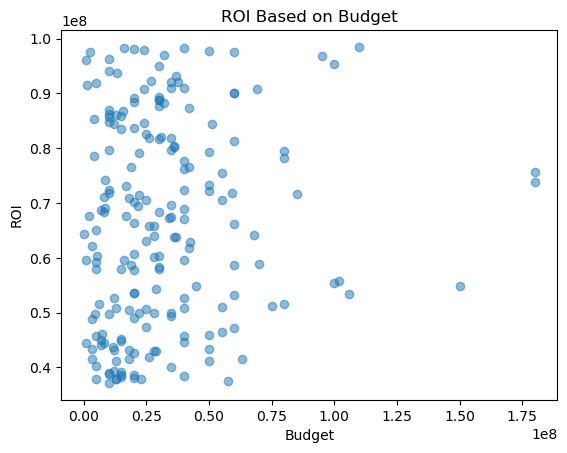

In [34]:
fig, ax = plt.subplots()
ax.plot(figsize=(5,5))

x = merged_mid['production_budget']
y = merged_mid['ROI']
ax.scatter(x, y, alpha=0.5)

ax.set_xlabel('Budget')
ax.set_ylabel('ROI')
ax.set_title('ROI Based on Budget');

In [35]:
data1 = merged_top.assign(Rank='Top 250')
data2 = merged_mid.assign(Rank='Mid')
data3 = merged_bot.assign(Rank='Bot 250')

concat = pd.concat([data1, data2, data3])
concat.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,original_language,popularity,title,vote_average,vote_count,Rank
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3111852904,en,26.526,Avatar,7.4,18676.0,Top 250
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2683973445,en,32.281,Star Wars Ep. VII: The Force Awakens,7.4,12641.0,Top 250
8,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2426949682,en,80.773,Avengers: Infinity War,8.3,13948.0,Top 250
36,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2086125489,en,20.709,Jurassic World,6.6,14056.0,Top 250
44,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1848317790,en,44.140,Black Panther,7.4,12365.0,Top 250


''

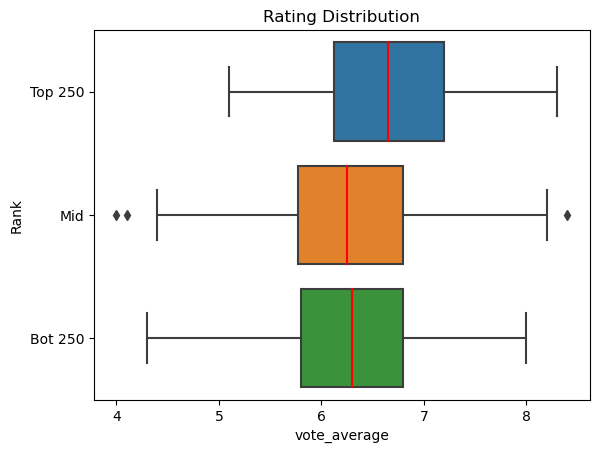

In [36]:
sns.boxplot(
    data=concat,
    x='vote_average',
    y='Rank',
    medianprops={'color': 'red'},
    orient='h'
).set(title='Rating Distribution')
;

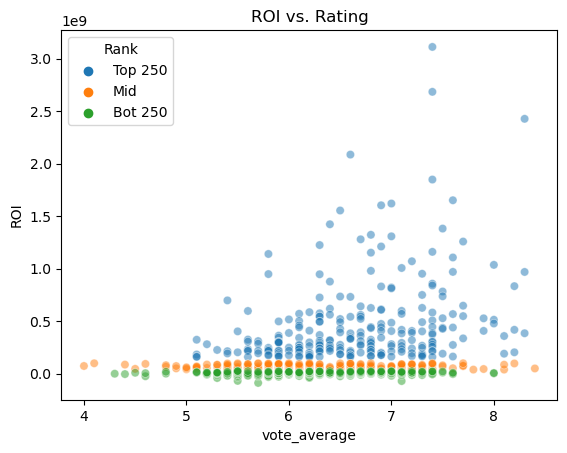

In [37]:
sns.scatterplot(
    data=concat,
    x='vote_average',
    y='ROI',
    hue='Rank',
    alpha=0.5,
).set(title='ROI vs. Rating');

In [38]:
find_rows = concat.loc[concat['movie'].str.contains('War Horse')]
find_rows

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,original_language,popularity,title,vote_average,vote_count,Rank
725,"Dec 25, 2011",War Horse,70000000,79883359,156815529,166698888,en,10.378,War Horse,7.2,1849.0,Top 250


In [70]:
movie_gross = pd.read_csv('bom.movie_gross.csv.gz')

In [71]:
movie_gross = movie_gross.dropna()
movie_gross = movie_gross.rename(columns={'title': 'movie'})
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [79]:
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].replace(',', '', regex=True)
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].astype('float64')

In [80]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.1+ KB
